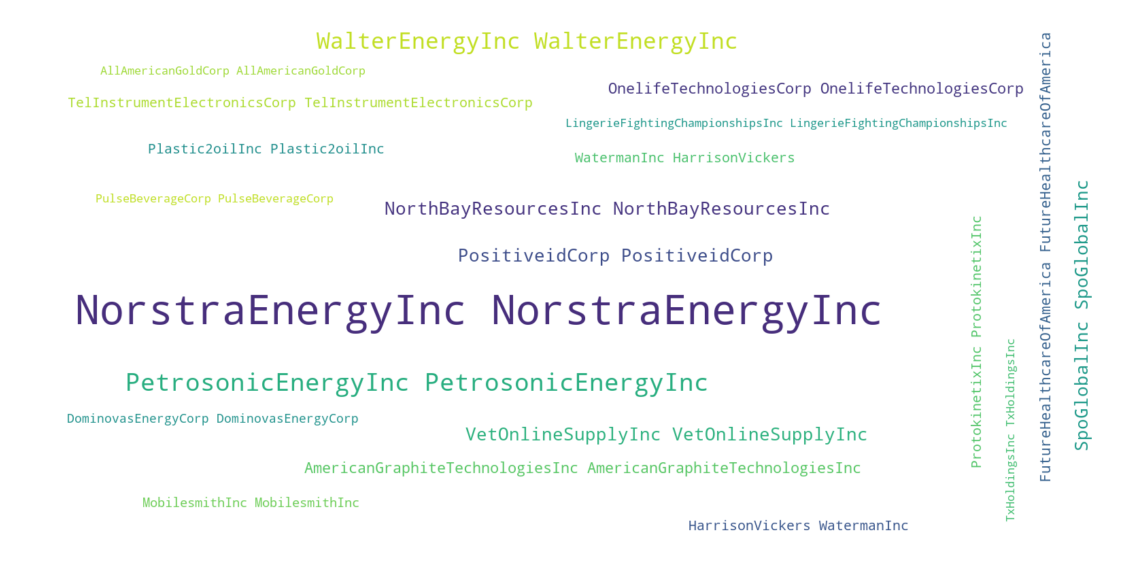

,pct_change
Daily Best Performing Stocks,
NorstraEnergyInc,900.00%
PetrosonicEnergyInc.,200.00%
WalterEnergyInc.,166.67%
PositiveidCorp,100.00%
SpoGlobalInc,100.00%
VetOnlineSupplyInc,100.00%
NorthBayResourcesInc,100.00%
AmericanGraphiteTechnologiesInc.,77.27%
OnelifeTechnologiesCorp,75.00%


In [162]:
#This function returns the best performing stock names and their percentage changes in a given period. 
#Daily: input 1; Weekly: input 2; Monthly: input 3; Quarterly: input 4; Year-to-Date: input 5

def get_best_performers(x=1):
    import requests
    from bs4 import BeautifulSoup
    import pandas as pd
    from wordcloud import WordCloud, STOPWORDS
    import matplotlib.pyplot as plt
    
    output_list = []
    stock_list = []
    pct_list = []
    freq_list=[]
    new_list=[]
    cloud_list=[]
    
    if x==1:
        url = "https://csimarket.com/markets/Stocks.php?days=yday&=#tablecomp"
    elif x==2:
        url = "https://csimarket.com/markets/Stocks.php?days=week&=#tablecomp"
    elif x==3:
        url = "https://csimarket.com/markets/Stocks.php?days=month&=#tablecomp"
    elif x==4:
        url = "https://csimarket.com/markets/Stocks.php?days=quarter&=#tablecomp"
    elif x==5:
        url = "https://csimarket.com/markets/Stocks.php?days=ytd&=#tablecomp"
    else:
        return 'Wrong input!'
    
    results_page = requests.get(url)
    soup = BeautifulSoup(results_page.content,'lxml')
    all_tags = soup.find_all('td', class_='lk')
    for tag in all_tags:
        output_list.append(tag.get_text().replace(',','').replace('\xa0','').replace(' ',''))
    for i in range(0,40):
        if i % 2 == 0:
            stock_list.append(output_list[i])
        if i % 2 == 1:
            pct_list.append((output_list[i]))
    
    df = pd.DataFrame(pct_list, stock_list)    
    if x==1:
        df.index.name = 'Daily Best Performing Stocks'
    elif x==2:
        df.index.name = 'Weekly Best Performing Stocks'
    elif x==3:
        df.index.name = 'Monthly Best Performing Stocks'
    elif x==4:
        df.index.name = 'Quarterly Best Performing Stocks'
    elif x==5:
        df.index.name = 'Year-to-Date Best Performing Stocks'
    else:
        return None
    df.columns = ['pct_change']
    
    #Linerize Stock name's font in word cloud with its return by increasing frequency
    for i in pct_list:
        x=round(float(i.replace('%','')))
        freq_list.append(x)
    new_list=stock_list+freq_list
    for i in range(0,20):
        for x in range(0,new_list[i+20]):
            cloud_list.append(new_list[i])
    
    #Creating Word Cloud
    stock_string=(" ").join(cloud_list)
    wordcloud = WordCloud(width = 1600, height = 800, relative_scaling=0.5, max_words = 1000, max_font_size=60, min_font_size=10, 
                          background_color="white", repeat=True, margin=50, random_state=3).generate(stock_string)
    plt.figure(figsize=(20,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.savefig("wordcloud"+".png", bbox_inches='tight')
    plt.show()
    plt.close()
    
    return df

    
get_best_performers(1)

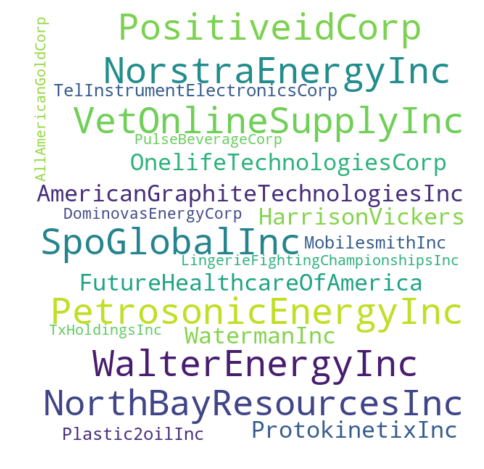

,pct_change
Daily Best Performing Stocks,
NorstraEnergyInc,900.00%
PetrosonicEnergyInc.,200.00%
WalterEnergyInc.,166.67%
PositiveidCorp,100.00%
SpoGlobalInc,100.00%
VetOnlineSupplyInc,100.00%
NorthBayResourcesInc,100.00%
AmericanGraphiteTechnologiesInc.,77.27%
OnelifeTechnologiesCorp,75.00%


In [146]:
#Daily: input 1; Weekly: input 2; Monthly: input 3; Quarterly: input 4; Year-to-Date: input 5

def get_best_performers(x=1):
    import requests
    from bs4 import BeautifulSoup
    import pandas as pd
    from wordcloud import WordCloud, STOPWORDS
    import matplotlib.pyplot as plt
    
    output_list = []
    stock_list = []
    pct_list = []
    
    if x==1:
        url = "https://csimarket.com/markets/Stocks.php?days=yday&=#tablecomp"
    elif x==2:
        url = "https://csimarket.com/markets/Stocks.php?days=week&=#tablecomp"
    elif x==3:
        url = "https://csimarket.com/markets/Stocks.php?days=month&=#tablecomp"
    elif x==4:
        url = "https://csimarket.com/markets/Stocks.php?days=quarter&=#tablecomp"
    elif x==5:
        url = "https://csimarket.com/markets/Stocks.php?days=ytd&=#tablecomp"
    else:
        return 'Wrong input!'
    
    results_page = requests.get(url)
    soup = BeautifulSoup(results_page.content,'lxml')
    all_tags = soup.find_all('td', class_='lk')
    for tag in all_tags:
        output_list.append(tag.get_text().replace(',','').replace('\xa0','').replace(' ',''))
    for i in range(0,40):
        if i % 2 == 0:
            stock_list.append(output_list[i])
        if i % 2 == 1:
            pct_list.append((output_list[i]))
    
    df = pd.DataFrame(pct_list, stock_list)    
    if x==1:
        df.index.name = 'Daily Best Performing Stocks'
    elif x==2:
        df.index.name = 'Weekly Best Performing Stocks'
    elif x==3:
        df.index.name = 'Monthly Best Performing Stocks'
    elif x==4:
        df.index.name = 'Quarterly Best Performing Stocks'
    elif x==5:
        df.index.name = 'Year-to-Date Best Performing Stocks'
    else:
        return None
    df.columns = ['pct_change']
    
    stock_string=(" ").join(stock_list)
    wordcloud = WordCloud(width = 600, height = 600, max_font_size=50, min_font_size=10, background_color="white").generate(stock_string)
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.savefig("wordcloud"+".png", bbox_inches='tight')
    plt.show()
    plt.close()
    
    return df

    
get_best_performers(1)



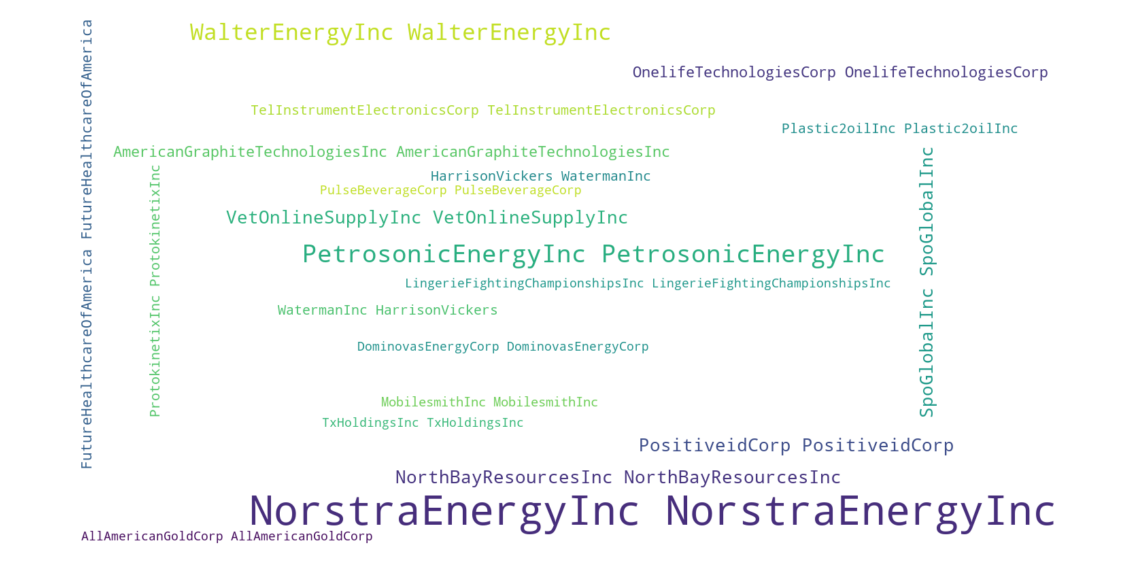

,pct_change
NorstraEnergyInc,900.00%
PetrosonicEnergyInc.,200.00%
WalterEnergyInc.,166.67%
PositiveidCorp,100.00%
SpoGlobalInc,100.00%
VetOnlineSupplyInc,100.00%
NorthBayResourcesInc,100.00%
AmericanGraphiteTechnologiesInc.,77.27%
OnelifeTechnologiesCorp,75.00%
FutureHealthcareOfAmerica,70.00%


In [147]:
output_list = []
stock_list = []
pct_list = []
url = "https://csimarket.com/markets/Stocks.php?days=yday&=#tablecomp"
results_page = requests.get(url)
soup = BeautifulSoup(results_page.content,'lxml')
all_tags = soup.find_all('td', class_='lk')
for tag in all_tags:
    output_list.append(tag.get_text().replace(',','').replace('\xa0','').replace(' ',''))
for i in range(0,40):
    if i % 2 == 0:
        stock_list.append(output_list[i])
    if i % 2 == 1:
        pct_list.append((output_list[i]))
df = pd.DataFrame(pct_list, stock_list)
df.columns = ['pct_change']
df

freq_list=[]
new_list=[]
cloud_list=[]

for i in pct_list:
    x=round(float(i.replace('%','')))
    freq_list.append(x)
new_list=stock_list+freq_list
for i in range(0,20):
    for x in range(0,new_list[i+20]):
        cloud_list.append(new_list[i])

stock_string=(" ").join(cloud_list)
wordcloud = WordCloud(width = 1600, height = 800, relative_scaling=0.5, max_words = 1000, max_font_size=60, min_font_size=10, 
                      background_color="white", repeat=True, margin=10, random_state=3).generate(stock_string)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig("wordcloud"+".png", bbox_inches='tight')
plt.show()
plt.close()
df

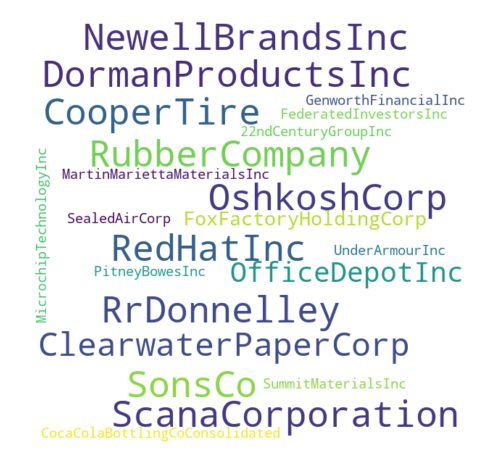

In [26]:
stock_string=(" ").join(m_stock_list)
wordcloud = WordCloud(width = 600, height = 600, max_font_size=50, min_font_size=10, background_color="white").generate(stock_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()


In [163]:
def get_all_indexes():
    import requests
    from bs4 import BeautifulSoup
    import pandas as pd
    index_list = []
    last_list = []
    change_list = []
    change2_list = []
    url = "https://markets.wsj.com/"
    results_page = requests.get(url)
    soup = BeautifulSoup(results_page.content,'lxml')
    index_tags = soup.find_all('td', class_='firstCol')
    last_tags = soup.find_all('td', class_='dataCol dataColCenter')
    for tag in index_tags:
        index_list.append(tag.get_text().replace('\n',''))
    for tag in last_tags:
        last_list.append(tag.get_text())
    index_list = index_list[23:42]

    df = pd.DataFrame(last_list, index_list)
    df.index.name = 'Major U.S. Stock Indexes'
    df.columns = ['Last']
    return df

get_all_indexes()

,Last
Major U.S. Stock Indexes,
DJIA,25538.46
DJ Transportation Average,10820.20
DJ Utility Average,741.92
DJ Total Stock Market,28418.59
Barron's 400,687.81
Nasdaq Composite,7330.54
Nasdaq 100,6949.01
S&P 500,2760.17
S&P MidCap 400,1878.65


In [2]:
def get_all_currencies():
    import requests
    from bs4 import BeautifulSoup
    import pandas as pd
    index_list = []
    last_list = []
    change_list = []
    change2_list = []
    url = "https://markets.on.nytimes.com/research/markets/currencies/currencies.asp"
    results_page = requests.get(url)
    soup = BeautifulSoup(results_page.content,'lxml')
    index_tags = soup.find_all('td', class_='colText')
    #last_tags = soup.find_all('td', class_='dataCol dataColCenter')
    for tag in index_tags:
        index_list.append(tag.get_text())   #.replace('\n',''))
    #for tag in last_tags:
     #   last_list.append(tag.get_text())
    #index_list = index_list[23:42]

    #df = pd.DataFrame(last_list, index_list)
    #df.index.name = 'Major U.S. Stock Indexes'
    #df.columns = ['Last']
    return index_list

get_all_currencies()

['Canada Dollar',
 'Mexico Peso',
 'Dominican Republic Peso',
 'El Salvador Colon',
 'Guatemala Quetzal',
 'Honduras Lempira',
 'Nicaragua Cordoba',
 'Argentina Peso',
 'Bolivia Boliviano',
 'Brazil Real',
 'Chile Peso',
 'Colombia Peso',
 'Paraguay Guarani',
 'Peru New Sol',
 'Uruguay New Peso',
 'Dollar U.S.',
 'Euro Europe',
 'Pound Britain',
 'Yen Japan',
 'Yuan China',
 'Euro ',
 'Pound Britain',
 'Yen Japan',
 'Yuan China',
 'Peso Mexico',
 'Dollar Canada']

In [21]:
#get_all_currencies():
import requests
from bs4 import BeautifulSoup
import pandas as pd
index_list = []
last_list = []
change_list = []
change2_list = []
url = "https://markets.on.nytimes.com/research/markets/currencies/currencies.asp"
results_page = requests.get(url)
soup = BeautifulSoup(results_page.content,'lxml')
index_tags = soup.find_all('td')
#last_tags = soup.find_all('td', class_='dataCol dataColCenter')
for tag in index_tags:
    index_list.append(tag.get_text().strip('\xa0'))
#for tag in last_tags:
#   last_list.append(tag.get_text())
#index_list = index_list[23:42]

#df = pd.DataFrame(last_list, index_list)
#df.index.name = 'Major U.S. Stock Indexes'
#df.columns = ['Last']
#index_list.index('0.0613')
index_list=index_list[60:90]
index_list

['Dollar U.S.',
 '--',
 '1.1315',
 '1.2757',
 '0.0088',
 '0.1436',
 'Euro Europe',
 '0.8835',
 '--',
 '1.127',
 '0.0078',
 '0.1268',
 'Pound Britain',
 '0.7836',
 '0.8866',
 '--',
 '0.0069',
 '0.1125',
 'Yen Japan',
 '113.46',
 '128.38',
 '144.74',
 '--',
 '16.2896',
 'Yuan China',
 '6.9558',
 '7.8705',
 '8.8735',
 '0.0613',
 '--']

In [35]:
l1 = index_list[::6]
l2 = index_list[1::6]
l3 = index_list[2::6]
l4 = index_list[3::6]
l5 = index_list[4::6]
l6 = index_list[5::6]
l

['--', '0.8835', '0.7836', '113.46', '6.9558']

In [49]:
df = pd.DataFrame(l2, columns=['Dollar'])
df.rename(index={0:l1[0],1:l1[1],2:l1[2],3:l1[3],4:l1[4]}, inplace=True)
df['Euro'] = l3
df['Pound'] = l4
df['Yen'] = l5


,a,Dollar
Dollar U.S.,--,1.1315
Euro Europe,0.8835,--
Pound Britain,0.7836,0.8866
Yen Japan,113.46,128.38
Yuan China,6.9558,7.8705


 def get_all_currencies():
    import requests
    from bs4 import BeautifulSoup
    import pandas as pd
    index_list = []
    last_list = []
    change_list = []
    change2_list = []
    url = "https://markets.on.nytimes.com/research/markets/currencies/currencies.asp"
    results_page = requests.get(url)
    soup = BeautifulSoup(results_page.content,'lxml')
    index_tags = soup.find_all('div', class_='columnGroup')
    #last_tags = soup.find_all('td', class_='dataCol dataColCenter')
    for tag in index_tags:
        index_list.append(tag.get_text())
    #for tag in last_tags:
     #   last_list.append(tag.get_text())
    #index_list = index_list[23:42]

    #df = pd.DataFrame(last_list, index_list)
    #df.index.name = 'Major U.S. Stock Indexes'
    #df.columns = ['Last']
    return index_list

get_all_currencies()